In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv (r"C:\Users\Lenovo\Desktop\DS\Project\happiness_score_dataset.csv.txt")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.shape

(158, 12)

In [4]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
data = data.drop(columns = ['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'])
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [6]:
data.columns = ['Happiness_Score', 'Economy', 'Family','Health','Freedom','Trust','Generosity']

In [7]:
#check for stats
data.describe()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

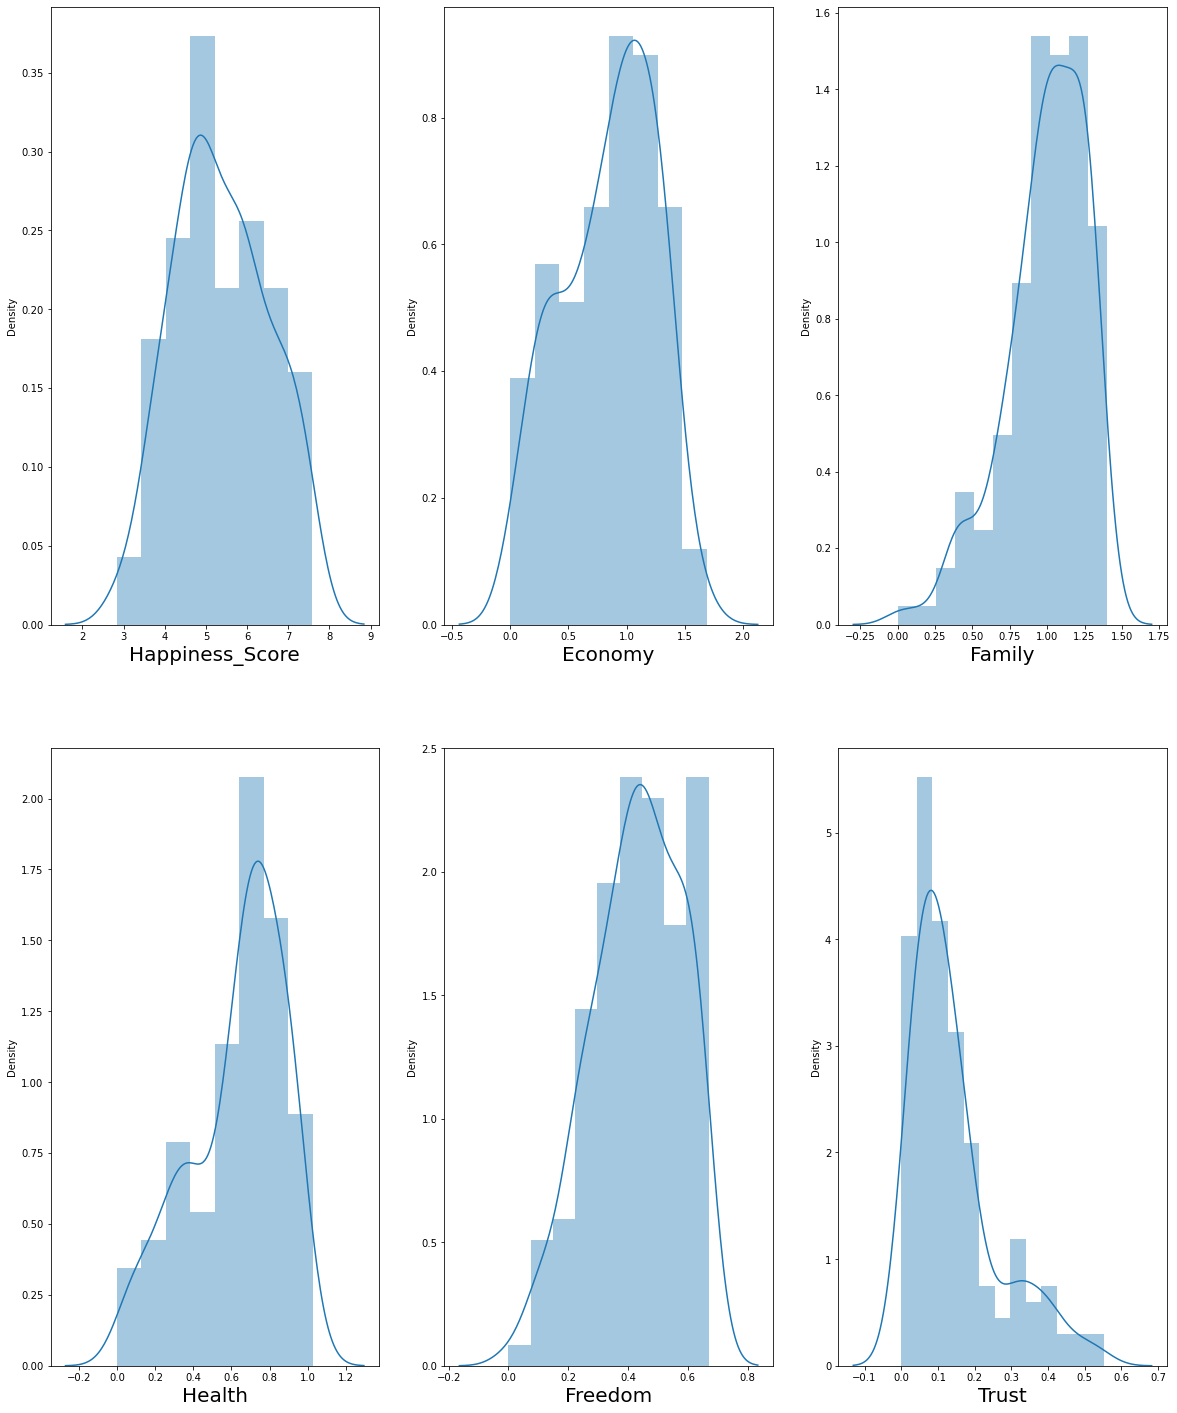

In [8]:
#check for skewness
plt.figure (figsize = (20,25), facecolor ='white')
plotnumber = 1
for column in data:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_v

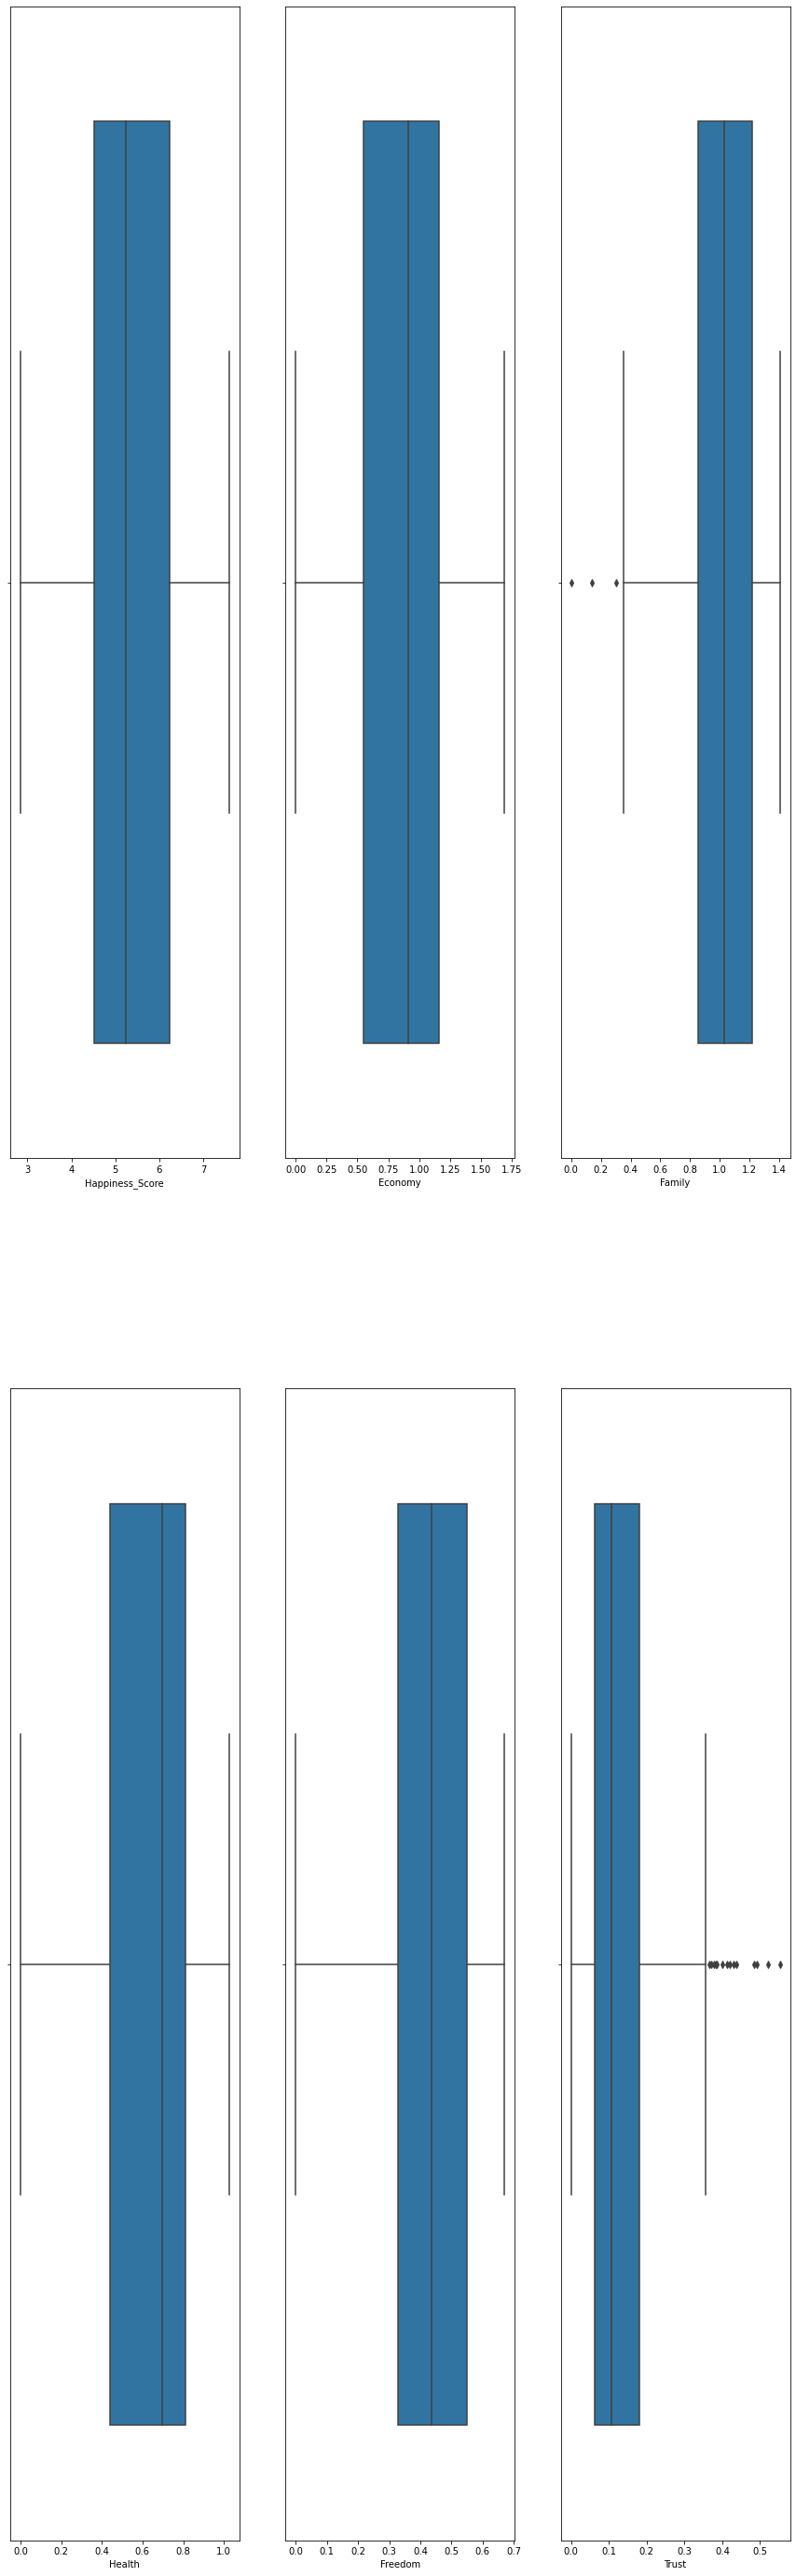

In [9]:
#check for outliers
plt.figure (figsize =(15,50))
graph = 1
for column in data:
    if graph<=6:
        ax = plt.subplot(2,3,graph)
        sns.boxplot(data[column],orient = 'v')
        plt.xlabel(column, fontsize = 10)
    graph+=1
plt.show()

In [10]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [13]:
#outliers removal
tru_high = (q3.Trust +(1.5*iqr.Trust))
tru_out = np.where(data['Trust']>tru_high)

data = data.drop(data.index[tru_out])
print(data.shape)
data.reset_index()

(144, 7)


,index,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
2,6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
3,9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
4,10,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172
...,...,...,...,...,...,...,...,...
139,152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
140,154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
141,155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
142,156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

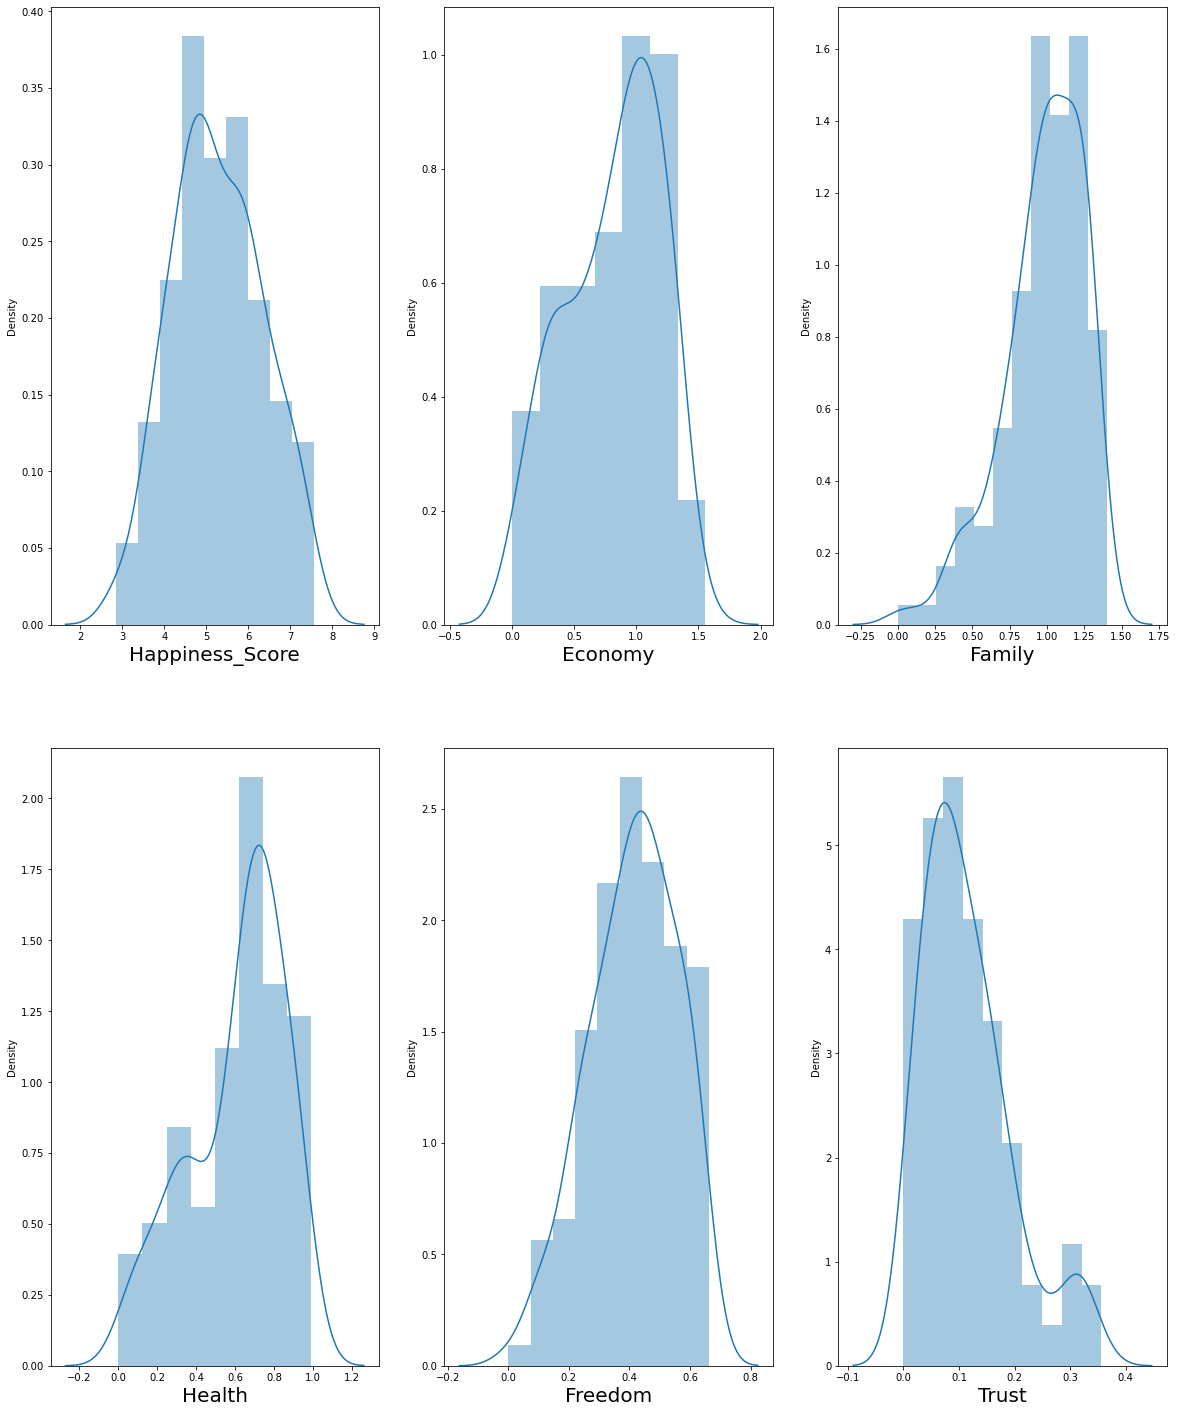

In [15]:
#confirming the normal distribution
plt.figure (figsize = (20,25), facecolor ='white')
plotnumber = 1
for column in data:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

In [16]:
#Model building
x = data.drop(columns = ['Happiness_Score'])
y = data['Happiness_Score']

In [17]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.25,random_state = 10)

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
#Training score
regression.score(x_train,y_train)

0.7448720777520372

In [20]:
#model testing score
regression.score(x_test,y_test)

0.7657973982270652

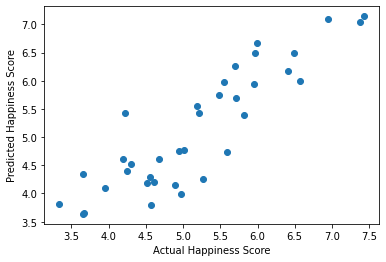

In [22]:
#visualising actual vs predicted
y_pred = regression.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()

In [23]:
from sklearn.linear_model import Lasso,LassoCV

In [25]:
lasscv = LassoCV(alphas=None,max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [26]:
alpha = lasscv.alpha_
alpha

0.002375545597604794

In [27]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.002375545597604794)

In [28]:
#model evaluation
lasso_reg.score(x_test,y_test)

0.7691384257813636